<a href="https://colab.research.google.com/github/kimjaehwankimjaehwan/The-Hundred-Page-Machine-Learninng-Book/blob/main/RNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 123ms/step


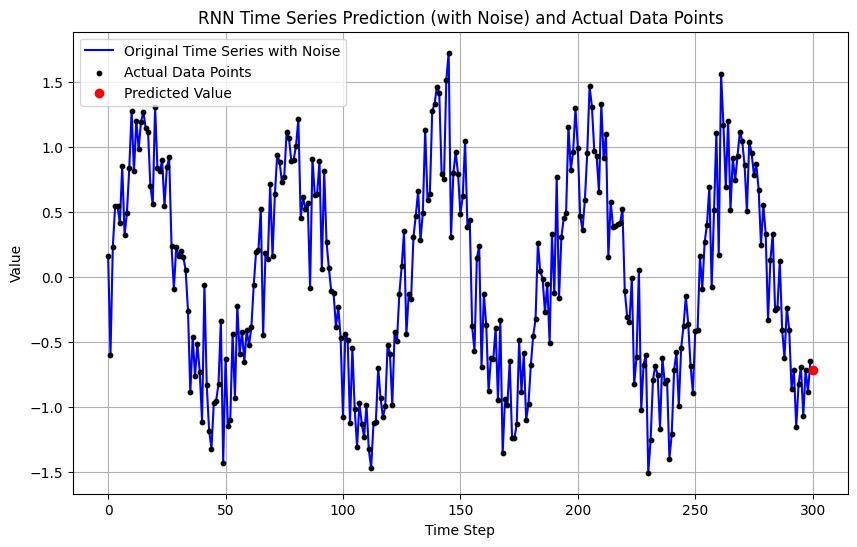

예측값: [[-0.7178089]]


In [10]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense

# 1. 데이터 준비 (사인 함수 + 노이즈 추가)
def create_time_series(n_steps):
    # 사인 함수 + 가우시안 노이즈 추가
    noise = 0.3 * np.random.randn(n_steps)  # 표준 편차 0.3의 가우시안 노이즈 추가
    return np.sin(np.arange(n_steps) * 0.1) + noise

n_steps = 300  # 데이터 포인트 300개
time_series = create_time_series(n_steps)

# 데이터를 RNN에 맞게 [samples, time steps, features] 형태로 변환합니다.
X = []
y = []
time_step = 10  # 한 번에 10 스텝을 입력으로 사용합니다.
for i in range(len(time_series) - time_step):
    X.append(time_series[i:i + time_step])
    y.append(time_series[i + time_step])

X = np.array(X)
y = np.array(y)

# 3차원으로 변환: [샘플 수, 타임스텝, 피처 수]
X = X.reshape((X.shape[0], X.shape[1], 1))

# 2. 모델 구성
model = Sequential()

# SimpleRNN 레이어를 추가 (유닛 50)
model.add(SimpleRNN(50, activation='tanh', input_shape=(time_step, 1)))

# 출력 레이어 추가 (단일 출력)
model.add(Dense(1))

# 3. 모델 컴파일
model.compile(optimizer='adam', loss='mse')

# 4. 모델 학습
model.fit(X, y, epochs=200, verbose=0)

# 5. 테스트 데이터로 예측
test_input = time_series[-time_step:].reshape((1, time_step, 1))  # 마지막 10개 값을 테스트로 사용
predicted = model.predict(test_input)

# 6. 예측 결과 시각화
plt.figure(figsize=(10, 6))

plt.plot(np.arange(n_steps), time_series, label='Original Time Series with Noise', color='blue')

plt.scatter(np.arange(n_steps), time_series, color='black', s=10, label='Actual Data Points', zorder=3)

plt.scatter(n_steps, predicted, color='red', label='Predicted Value', zorder=5)

plt.title("RNN Time Series Prediction (with Noise) and Actual Data Points")
plt.xlabel("Time Step")
plt.ylabel("Value")
plt.legend()
plt.grid(True)

plt.show()

print(f"예측값: {predicted}")
